# Before you start


In this class, we will be using Google Colab notebooks for assignments instead of regular Python files. Colab provides more efficient Google GPU and is easier for setting up. Colab is also a very powerful platform and it functions very similarly to a Jupyter notebook. We'll provide a few tips on how to use Colab below; make sure you read them carefully!


☝ **Quick Colab Tips:**

- Make sure you **create a copy** of the Colab before you start coding!!! (File->Save a copy in Drive). If you don't do this, you will lose everything when you close the page and we DON'T want that to happen to you!
- Make sure you hit every play button that you need in previous cells, so that every function and variable you need is defined.
- If you don't want to click everything individually, you can click Runtime and you will find "Run Before", "Run After", or "Run All".
- When you reload the page, the runtime restarts and all variables in the environment are cleared, so you will need to re-run cells.
- If you make changes to a definition in an earlier cell, remember to run the cell to actually update the definition. Then remember to re-run the cells after, or else they will still be using the previous value.
- For more tips on getting started, please take a look at this [video](https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow).


**Collaboration policy form:**

Before you start coding, make sure to fill out the [collaboration policy form](https://docs.google.com/forms/d/e/1FAIpQLSeQ4mw2BUb8j0zY20UiWSenWRrkHsKOaUx-VXm1i3h3FTQQxg/viewform?usp=sf_link).


# Introduction


Welcome to your first assignment! In this assignment, you will be implementing your very first NLP model (Woohoo!) -- a Bag of Words (BOW) model for sentiment classification. In this assignment, you will be using a very useful NLP libary (spaCy), and a popular machine learning library (scikit-learn, or sklearn) to help you with preprocessing the data and building the BOW model. In later lectures and assignments, you will learn to implement many of these NLP and ML functions yourself, but in "the real world" it is often more practical to use existing libraries like those provided by spacy and sklearn than to implement these algorithms from scratch. So, in this assignment, we want you to learn how to use these libraries in a practical setting, and we'll later learn about how they work "under the hood".

The main learning objectives for this assignment are:

1. Use sklearn to implement a standard ML workflow (featurization, designing train-test splits, training a model, and evaluating the model).
2. Use spaCy for standard NLP preprocessing steps (tokenization, lemmatization, tagging).
3. Understand and implement common featurization approaches for text classifiers (ngrams, weighting schemas, tagging).


The basic workflow for an NLP model contains the following steps:

1. Load and Explore Data
2. Preprocess Data
3. Extract Features
4. Train the Model
5. Evaluate the Model
6. Analyze Model Behavior

You will implement this full workflow in Part 1. In Part 2, you will experiment with improvements to step 2 (preprocessing). In Part 3, you will experiment with improvements to step 3 (featurization).


### Installation and Imports


☝ **Quick Tip:** You can add "**!**" in front a Linux command and it can run on Colab!


In [14]:
!pip install spacy
!pip install sklearn

import os
import spacy

from google.colab import drive

import numpy as np
import pandas as pd
import pickle
from typing import List, Tuple, TypeAlias

drive.mount("/content/drive", force_remount=True)

  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Mounted at /content/drive


# Part 1: BOW Workflow


### Step 1: Load the raw data from disk and explore the data


In this assignment, we will use a Twitter dataset with social media text. Mount the path to your copied handout folder in the cell below, so that you can access it from this notebook.

In the dataset, the tweets are rated for three categories of sentiment: positive, negative and neutral. We will use the tweets in the `text` column and the sentiments in the `sentiment` column. Read the pandas documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you are unfamiliar with dataframes.


In [4]:
# Change this folder if you've placed the .csv elsewhere in your drive.
# FOLDER = "/content/drive/My Drive"  # Extend this string to point to the directory with your copy of Tweets_5K.csv
# FILEPATH = f"{FOLDER}/Tweets_5K.csv"
FILEPATH = f"Tweets_5K.csv"
pd.read_csv(
    FILEPATH,
    usecols=[1, 2],
)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
4995,look like i can only quick post from the dash...,neutral
4996,Thanks Elaine. I`m clipping reviews for her s...,positive
4997,"K now that, that fiasco is all wrapped and goo...",positive
4998,No. I won`t be back until the 7th,neutral


In [5]:
def load_data() -> Tuple[List[str], List[int]]:
    """
    Loads Twitter data into two lists.

    Returns
    -------
    raw_tweets : List[str]
        A list of all Tweets in the dataset
    labels : List[int]
        A list of the sentiments corresponding to each raw tweet encoded as integers,
        -1 meaning negative, 0 meaning neutral, and 1 meaning positive
    """
    # TODO: Load data from the csv file using the FILEPATH variable
    # Remember to map positive tweets to 1, neutral tweets to 0, and negative tweets to -1.

    # Initialize two return lists
    raw_tweets = []
    labels = []

    # Extract tweet texts and sentiments from datafile
    data = pd.read_csv(FILEPATH, usecols=[1, 2])
    raw_tweets = data['text'].tolist()
    sentiments = data['sentiment']

    # Set sentiments into corresponding integers
    for sentiment in sentiments:
        if sentiment == "positive":
            labels.append(1)
        elif sentiment == "neutral":
            labels.append(0)
        elif sentiment == "negative":
            labels.append(-1)

    return raw_tweets, labels

Before you start to preprocess data, you should always take a look at the dataset and get a sense of the data you're handling.


In [6]:
raw_tweets, labels = load_data()
for p, label in zip(raw_tweets[:10], labels[:10]):
    print(f"{label}:\t{p}\n")

0:	 I`d have responded, if I were going

-1:	 Sooo SAD I will miss you here in San Diego!!!

-1:	my boss is bullying me...

-1:	 what interview! leave me alone

-1:	 Sons of ****, why couldn`t they put them on the releases we already bought

0:	http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth

1:	2am feedings for the baby are fun when he is all smiles and coos

0:	Soooo high

0:	 Both of you

1:	 Journey!? Wow... u just became cooler.  hehe... (is that possible!?)



We can use matplotlib to see the ratio between positive, negative and neutral sentiments.


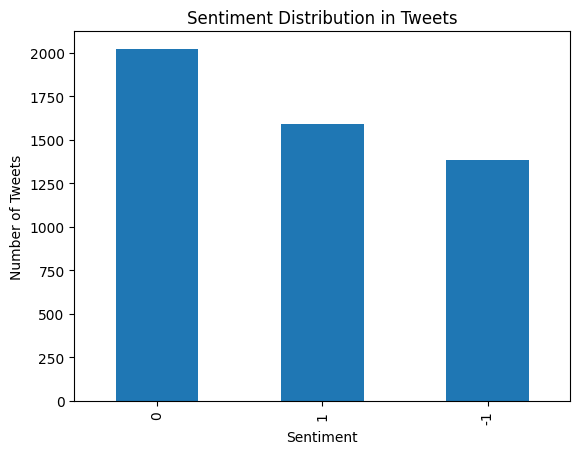

In [7]:
import matplotlib.pyplot as plt

plt.figure()
pd.value_counts(labels).plot.bar(title="Sentiment Distribution in Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

### Step 2: Preprocess the data


For now, all you need to do for preprocessing is split the tweets by whitespace.


In [8]:
def preprocess(raw_X: List[str]) -> List[List[str]]:
    """
    Performs splitting on whitespace on all raw strings in a list.

    Parameters
    ----------
    raw_X : List[str]
        A list of raw strings (tweets)

    Returns
    -------
    List[List[str]]
        A list of preprocessed tweets (which are now lists of words)
    """
    # TODO: Basic tokenization just based on whitespace, with no other preprocessing

    # Initialzie the return list
    prep_X = []

    for raw_text in raw_X:
        # Preprocess the raw strings by splitting them on whitespace
        words = raw_text.split()
        prep_X.append(words)

    return prep_X

### Step 3: Define the Model


In [9]:
from scipy.sparse import csr_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


class BOW_Classifier:
    """
    Attributes
    ----------
    clf : LogisticRegression
        A logistic regression classifier
    dv : DictVectorizer
        A dictionary vectorizer for turning dictionaries into matrices
    """

    def __init__(self):
        # TODO: Initialize class attributes
        # HINT: Use max_iter=150 when initializing your LogisticRegression classifier to get expected performance!
        # You are allowed to not use the dv attribute as well as add more to the init method if you wish
        self.clf = LogisticRegression(max_iter=150) # ...
        self.dv = DictVectorizer() # ...

    def featurize(
        self, preproc_X: np.ndarray[List[str]], is_test: bool = False
    ) -> csr_matrix:
        """
        Turns a list of preprocessed tweets into a binary bag of words
        matrix.

        Parameters
        ----------
        preproc_X : np.ndarray[List[str]]
            A list of preprocessed tweets
        is_test: bool, default=False
            Whether featurization should be done using features learned during training (is_test=True)
            or whether it should be done with features extracted from scratch using preproc_X (is_test=False)

        Returns
        -------
        csr_matrix
            A matrix with rows corresponding to tweets and columns corresponding to words
        """
        # TODO: Implement a binary bag of words for unigrams

        vocab = []
        # Loop through each tweet and create a feature vector
        for tweet in preproc_X:
            word_presence = {word: 1 for word in tweet}
            vocab.append(word_presence)

        # Check if the featurize data is for testing or not
        if not is_test:
            matrix = self.dv.fit_transform(vocab)
        else:
            matrix = self.dv.transform(vocab)

        return matrix

    def train(self, X_train: np.ndarray[List[str]], y_train: np.ndarray[int]):
        """
        Trains the BOW classifier on the given training data.

        Parameters
        ----------
        X_train : np.ndarray[List[str]]
            Preprocessed tweets for training
        y_train : np.ndarray[int]
            Sentiments corresponding to the tweets in X_train
        """
        # TODO

        # Featurize the training data
        X_train_feats = self.featurize(X_train, is_test=False)

        # Train the logistic regression classifier
        self.clf.fit(X_train_feats, y_train)

    def test(self, X_test: np.ndarray[List[str]]) -> np.ndarray[int]:
        """
        Classifies the given test data and returns predicted sentiments.

        Parameters
        ----------
        X_test : np.ndarray[List[str]]
            Preprocessed tweets for testing

        Returns
        -------
        y_pred : np.ndarray[int]
            Predicted sentiments for the tweets in X_test
        """
        # TODO

        # Featurize the testing data
        X_test_feats = self.featurize(X_test, is_test=True)

        # Predict sentiments for the tweets
        y_pred = self.clf.predict(X_test_feats)

        return y_pred

### Step 4: Evaluate the model


To evaluate the model, we need to simulate the "real world" setting in which we have trained on our model on the data we have, but now we are using it to assign labels to data we have never seen before. We will do this using stratified k-fold cross validation.

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called `k` that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. This procedure is called "stratified" when the data is divided so that examples from each class (in this case, classes are the three sentiments) are distributed evenly among all folds.


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


def run_kfold_crossval(
    model: BOW_Classifier, X: List[List[str]], y: List[int], k: int = 5
) -> List[float]:
    """
    Executes stratified k-fold cross-validation.

    Parameters
    ----------
    model : BOW_Classifier
        A BOW model that has train and test methods
    X : List[List[str]]
        Preprocessed tweets for training and testing
    y : List[int]
        Sentiments corresponding to the tweets in X
    k : int, default=5
        The number of folds to use for cross-validation

    Returns
    -------
    List[float]
        A list of accuracy values from testing with each fold
    """
    # TODO: Implement stratified k-fold cross-validation with a BOW_Classifier model
    # HINT: Consult the documentation for the imports at the top of this cell
    # HINT 2: If you have trouble casting a ragged nested list to a numpy array, try passing dtype=list

    X = np.array(X, dtype=list)
    y = np.array(y)

    lst_accu_stratified = []

    # Create StratifiedKFold object
    skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=False)

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):

        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Train the model
        model.train(X_train_fold, y_train_fold)

        # Test the model and calculate accuracy
        y_pred_fold = model.test(X_test_fold)
        accuracy = accuracy_score(y_test_fold, y_pred_fold)

        lst_accu_stratified.append(accuracy)

    return lst_accu_stratified

### Step 5: Analyze Model Performance


This function will plot how well our model is doing :)


In [11]:
def plot_perfs(perfs: List[List[float]], names: List[str], k: int = 5):
    """
    Plots performances of models in a bar chart.

    Parameters
    ----------
    perfs : List[List[float]]
        A list of accuracy results for each model
    names : List[str]
        The names of each of the models (in the same order as perfs)
    k : int, default=5
        The value of k used for cross-validation when producing the performances
    """
    means = []
    stds = []
    for i, perf in enumerate(perfs):
        mean = np.mean(perf)
        means.append(mean)
        stds.append(np.std(perf))
        print("%s:\t%.03f" % (names[i], mean))
    plt.bar(np.arange(len(means)), means, yerr=stds)
    plt.xticks(np.arange(len(names)), names)
    plt.ylabel(f"Accuracy with {k} Folds")
    plt.ylim(0, 1)
    plt.show()

### Run full workflow!


MFC Baseline:	0.405
Basic BOW:	0.598


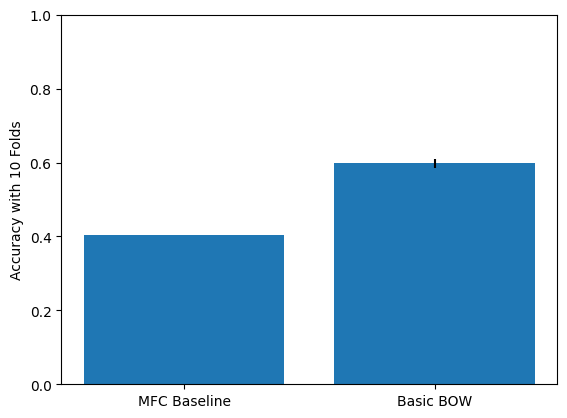

In [12]:
from collections import Counter

K_FOLD = 10
raw_tweets, y = load_data()

X_preproc = preprocess(raw_tweets)
bow_model = BOW_Classifier()
basic_bow_accs = run_kfold_crossval(bow_model, X_preproc, y, k=K_FOLD)

# here, we are going generate the "most frequent class" baseline based on the
# training data
counts = Counter(y).values()
mfc_baseline = [max(counts) / sum(counts)] * K_FOLD

# plot the results!
plot_perfs([mfc_baseline, basic_bow_accs], ["MFC Baseline", "Basic BOW"], k=K_FOLD)

### ❗ Conceptual Questions (Answer in the Colab cell below). 👈👈👈 [Don't miss this section!]

You will need to write/copy some code, or add some print statements to the functions you’ve already written, to help you answer these questions.

Use one iteration of stratified k-fold cross-validation with k=5 (the default value) to retrieve feature matrices for a single train/test set.

1. What are the dimensions of your training feature matrix (let's call it M_train)?
2. What is the value of M_train[1460][1460]?
3. What feature does the 1460th column of M_train represent?
4. Find an example of a word that appears in the test set but never appears in the training set. What word did you find, and what is the tweet in which it occurred?
5. What happens to that new word when the tweet is featurized at test time? I.e., what is the feature representation of the tweet that contains the unknown word?


In [13]:
# TODO: Copy code from other cells and combine them together along with some print statements to find the answers to the conceptual questions above
from sklearn.model_selection import StratifiedKFold
from collections import Counter

K_FOLD = 10
# Define the data and labels for demonstration
raw_tweets, y = load_data()
X = preprocess(raw_tweets)

# Initialize BOW classifier
bow_classifier = BOW_Classifier()

# Initialize StratifiedKFold with k=5
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
X = np.array(X, dtype=list)
y = np.array(y)

for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Train the model
    bow_classifier.train(X_train_fold, y_train_fold)

    # Print answers to conceptual Q1 to Q3
    print("Dimensions of training feature matrix (M_train):", bow_classifier.featurize(X_train_fold, is_test=False).shape)
    print("Value of M_train[1460][1460]:", bow_classifier.featurize(X_train_fold, is_test=False)[1460, 1460])
    print("Feature represented by the 1460th column of M_train:", bow_classifier.dv.get_feature_names_out()[1460])

    # Example of a word that appears in the test set but not in the training set
    new_word = None
    unknown_word_tweet = None
    for tweet in X_test_fold:
        for word in tweet:
            if word not in bow_classifier.dv.vocabulary_:
                new_word = word
                unknown_word_tweet = tweet
                break
        if new_word is not None:
            break

    print("Word that appears in test but not in training:", new_word)
    print("Tweet containing the new word:", " ".join(unknown_word_tweet))

    # Featurize the tweet with the new word
    tweet_feature = bow_classifier.featurize([unknown_word_tweet], is_test=True)
    print("Feature representation of the tweet with the new word:", tweet_feature.toarray())

Dimensions of training feature matrix (M_train): (4000, 12877)
Value of M_train[1460][1460]: 0.0
Feature represented by the 1460th column of M_train: Done
Word that appears in test but not in training: responded,
Tweet containing the new word: I`d have responded, if I were going
Feature representation of the tweet with the new word: [[0. 0. 0. ... 0. 0. 0.]]
Dimensions of training feature matrix (M_train): (4000, 12861)
Value of M_train[1460][1460]: 0.0
Feature represented by the 1460th column of M_train: Dorito`s....
Word that appears in test but not in training: poorly
Tweet containing the new word: I`m poorly and can`t sleep
Feature representation of the tweet with the new word: [[0. 0. 0. ... 0. 0. 0.]]
Dimensions of training feature matrix (M_train): (4000, 12877)
Value of M_train[1460][1460]: 0.0
Feature represented by the 1460th column of M_train: DotA
Word that appears in test but not in training: Gettin
Tweet containing the new word: Gettin some fuel, too bad no one is reading

### Conceptual Answers:

(All answers below are gained from 1st-split)
1. training feature matrix dimension: [4000, 12877].
2. M_train[1460][1460] is 0.0
3. The 1460th column of M_train represents the word 'Done'.
4. 'responded' only appears in testing set but not in training set. The tweet is: 'I`d have responded, if I were going'.
5. The feature representation of the tweet that contains the unknown word will be represented by a column consisting entirely of zeros.


# Part 2: Improved Preprocessing


In this section, we are going to improve the preprocessing step, but otherwise keep the above workflow the same.


### Loading Data with Spacy

The cell block below will load the dataset into spacy_processed_docs, a list of Spacy Documents that will be passed to the preprocess_part2 function below.


In [ ]:
NUM_TWEETS = 5000  # INFO: Feel free to change this to load in fewer tweets for debugging but otherwise keep it at 5000

nlp = spacy.load("en_core_web_sm")

# CACHE_PATH = f"{FOLDER}/parsed_tweets.pickle"
CACHE_PATH = f"parsed_tweets.pickle"

if os.path.exists(CACHE_PATH):
    print(f"Loading parsed tweets from cache at {CACHE_PATH}")
    parsed_tweets = pickle.load(open(CACHE_PATH, "rb"))
else:
    # parse all the tweets with spacy
    parsed_tweets = []
    for i, r in enumerate(raw_tweets):
        if i == NUM_TWEETS:
            break
        parsed_tweets.append(nlp(r))
        if (i + 1) % 500 == 0:
            print(f"Processed {i + 1} out of {len(raw_tweets)}", end="\r")
    print("Processing complete", " " * 10)
    if CACHE_PATH is not None:
        pickle.dump(parsed_tweets, open(CACHE_PATH, "wb"))

print(
    f"{len(parsed_tweets)} parsed tweets loaded."
)  # This should be 5000 when not debugging

Please program `preprocessing_part2` to do the following things (not necessarily in this order):

- lowercasing
- lemmatization
- remove stop words
- remove punctuation and extra white space
- use only top 1000 most frequent words, and replace the rest with "\<OOV\>"
- replace numbers with "\<NUM\>"

**Think about how each step affects the next one in the pipeline.** Specifically, one of these steps makes more sense to do last, so make sure your code reflects that.

Your final feature matrix should have 1001 columns (1000 most frequent words and one "\<OOV\>" token).

Use spacy to do these things. You shouldn't need to import any additional libraries (but hint: we've imported the Counter library in a previous cell). You can read the spacy documentation [here](http://spacy.pythonhumanities.com/01_02_linguistic_annotations.html#token-attributes) and [here](https://spacy.io/api/annotation#pos-tagging).


In [ ]:
spacy_doc: TypeAlias = spacy.tokens.doc.Doc


def preprocess_part2(parsed_tweets: List[spacy_doc]) -> List[List[str]]:
    """
    Preprocesses the spacy-parsed tweets.

    Parameters
    ----------
    parsed_tweets : List[spacy_doc]
        A list of tweets parsed by spacy

    Returns
    -------
        A list of preprocessed tweets formatted as lists of tokens (lists of strings)
    """
    # TODO: preprocessing steps outlined above

    # Count the frequency of each word and get the top 1000 most frequent words
    top_word = Counter()
    preprocessed_tweets_num = []

    for doc in parsed_tweets:
        tokens = []
        for token in doc:
            # Check if the token is a stop word or punctuation or whitespace and remove it
            if not token.is_stop and not token.is_punct and not token.is_space:
              # Replace numbers
              if token.like_num:
                tokens.append("<NUM>")
                # Update word frequency counter
                top_word.update(["<NUM>"])
              else:
                # Lowercasing and lemmatization
                tokens.append(token.lemma_.lower())
                # Update word frequency counter
                top_word.update([token.lemma_.lower()])

        preprocessed_tweets_num.append(tokens)

    # For each tuple, it extracts the first element, which is the word, and discards the second element
    top_words = [word for word, _ in top_word.most_common(1000)]

    preprocessed_tweets_oov = []
    for tweet in preprocessed_tweets_num:
        tokens_oov = [word if word in top_words else "<OOV>" for word in tweet]
        preprocessed_tweets_oov.append(tokens_oov)

    return preprocessed_tweets_oov

Now let's re-run the workflow and observe the difference in performance!


In [ ]:
X_preproc = preprocess_part2(parsed_tweets)
bow_model = BOW_Classifier()
better_preproc_accs = run_kfold_crossval(bow_model, X_preproc, y, k=K_FOLD)

plot_perfs(
    [mfc_baseline, basic_bow_accs, better_preproc_accs],
    ["MFC Baseline", "Basic BOW", "BOW+preproc"],
    k=K_FOLD,
)

# Part 3: Improved Featurization


In this section, we will expand the featurize function to include more advanced and sophisticated features. You will now add n-grams with n values from 1 to 5 as features to (partially) preserve the order of the sentence.


In [ ]:
class Better_BOW(BOW_Classifier):
    """
    A subclass of BOW_Classifier with a more complex featurization function.

    All attribute and method names match those of BOW_Classifier.
    """

    def featurize(
        self, preproc_X: np.ndarray[List[str]], is_test: bool = False
    ) -> csr_matrix:
        """
        Turns a list of preprocessed tweets into a bag of words
        matrix using n-grams up to 5-grams.

        Parameters
        ----------
        preproc_X : List[List[str]]
            A list of preprocessed tweets
        is_test: bool, default=False
            Whether featurization should be done using features learned during training (is_test=True)
            or whether it should be done with features extracted from scratch using preproc_X (is_test=False)

        Returns
        -------
        csr_matrix
            A matrix with rows corresponding to tweets and columns corresponding to n-grams
        """
        # TODO: Implement a binary BOW for 1-, 2-, 3-, 4-, and 5-grams

        # build up an n-gram vocabulary
        vocab = []

        # Iterate through each preprocessed tweet
        for tweet in preproc_X:
            n_grams = {}
            # Iterate through n-gram lengths from 1 to 5
            for n in range(1, 6):
                # Generate n-grams for this tweet
                for i in range(0, len(tweet)-n+1):
                    n_gram = " ".join(tweet[i:i+n])  # Convert the n-gram list to a string
                    n_grams.update({n_gram: 1})
            # Create a list of dictionaries where each dictionary represents word presence for an n-gram in a tweet
            vocab.append(n_grams)

        # Check if the featurize data is for testing or not
        if not is_test:
            matrix = self.dv.fit_transform(vocab)
        else:
            matrix = self.dv.transform(vocab)

        return matrix

(4500, 63083)
(4500, 62539)
(4500, 63120)
(4500, 63056)
(4500, 62945)
(4500, 63000)
(4500, 62805)
(4500, 62656)
(4500, 62798)
(4500, 62420)
MFC Baseline:	0.405
Basic BOW:	0.598
BOW+preproc:	0.634
Better Features:	0.638


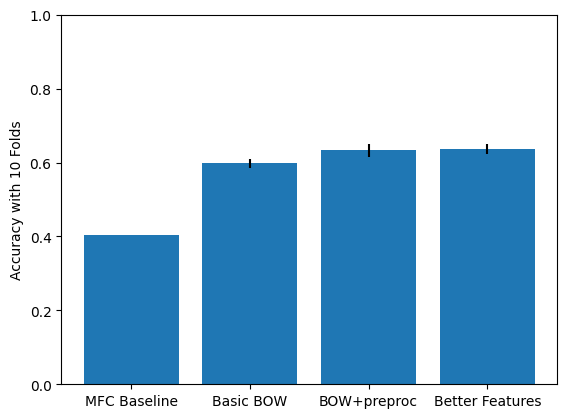

In [ ]:
X_preproc = preprocess_part2(parsed_tweets)
better_bow = Better_BOW()
better_feature_accs = run_kfold_crossval(better_bow, X_preproc, y, k=K_FOLD)

plot_perfs(
    [mfc_baseline, basic_bow_accs, better_preproc_accs, better_feature_accs],
    ["MFC Baseline", "Basic BOW", "BOW+preproc", "Better Features"],
    k=K_FOLD,
)

# Submission Instructions

Please submit this Colab as **two** files to Gradescope:

1.  A `.py` file: Click File > Download > Download .py
2.  A `.ipynb` file with outputs: Click Runtime > Run All, and then after all outputs are complete, click File > Download > Download .ipynb

Please ensure that the `.ipynb` contains actual function outputs (and not leftover print statements, for instance). We will run your `.ipynb` file; if our outputs don't match the outputs in your submitted file (within reason), you will receive a 0 on this assignment.


Last updated: 14 Sep 2023
